In [41]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('FG-HAR_Merged_Featured_Dataset.csv')

In [3]:
df.head(6)

,X_mean,X_std,X_min,X_max,X_rms,X_skew,X_kurtosis,Y_mean,Y_std,Y_min,...,Y_skew,Y_kurtosis,Z_mean,Z_std,Z_min,Z_max,Z_rms,Z_skew,Z_kurtosis,label
0,5.165439,5.605758,-3.27000,13.827001,7.602107,0.061105,-1.664771,0.469482,2.813966,-6.39495,...,-0.892227,-0.405582,6.913089,2.554948,2.18100,12.217951,7.365683,-0.085984,-0.976379,Backward walking
1,10.239267,2.999758,3.29205,14.947051,10.665419,-0.722875,-0.374445,-2.780028,2.383208,-7.58895,...,0.214970,-0.773506,3.844676,2.560224,-0.28095,9.622951,4.612020,0.628791,-0.390418,Backward walking
2,9.970649,3.733627,3.02100,15.973950,10.640226,-0.538722,-1.019909,-3.766703,1.676215,-7.58895,...,-0.369381,-0.766340,2.120591,1.360937,-0.28095,6.397950,2.516055,0.629998,0.194674,Backward walking
3,11.561781,3.915597,3.02100,18.175051,12.200548,-0.527011,-0.530925,-3.280710,2.254498,-7.00800,...,0.443075,-0.393361,2.884548,3.823664,-4.27995,16.401001,4.774392,1.256241,1.825763,Backward walking
4,12.687782,3.761485,1.87905,18.175051,13.228269,-1.175281,0.821686,-3.046296,2.657696,-7.00800,...,0.497779,-1.025106,2.762675,4.230508,-4.27995,16.401001,5.034937,1.041174,0.673144,Backward walking
5,11.547216,4.498490,-0.33195,17.497051,12.384355,-1.030006,-0.021333,-3.212763,3.018080,-7.97700,...,0.492737,-1.004118,2.303787,2.597388,-4.55295,10.477950,3.462137,0.214753,0.990038,Backward walking


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589 entries, 0 to 3588
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X_mean      3589 non-null   float64
 1   X_std       3589 non-null   float64
 2   X_min       3589 non-null   float64
 3   X_max       3589 non-null   float64
 4   X_rms       3589 non-null   float64
 5   X_skew      3589 non-null   float64
 6   X_kurtosis  3589 non-null   float64
 7   Y_mean      3589 non-null   float64
 8   Y_std       3589 non-null   float64
 9   Y_min       3589 non-null   float64
 10  Y_max       3589 non-null   float64
 11  Y_rms       3589 non-null   float64
 12  Y_skew      3589 non-null   float64
 13  Y_kurtosis  3589 non-null   float64
 14  Z_mean      3589 non-null   float64
 15  Z_std       3589 non-null   float64
 16  Z_min       3589 non-null   float64
 17  Z_max       3589 non-null   float64
 18  Z_rms       3589 non-null   float64
 19  Z_skew      3589 non-null  

In [5]:
datadict = pd.DataFrame(df.dtypes)
datadict

,0
X_mean,float64
X_std,float64
X_min,float64
X_max,float64
X_rms,float64
X_skew,float64
X_kurtosis,float64
Y_mean,float64
Y_std,float64
Y_min,float64


In [6]:
datadict['MissingVal'] = df.isnull().sum()
datadict

,0,MissingVal
X_mean,float64,0
X_std,float64,0
X_min,float64,0
X_max,float64,0
X_rms,float64,0
X_skew,float64,0
X_kurtosis,float64,0
Y_mean,float64,0
Y_std,float64,0
Y_min,float64,0


In [7]:
print(df.columns.tolist())

['X_mean', 'X_std', 'X_min', 'X_max', 'X_rms', 'X_skew', 'X_kurtosis', 'Y_mean', 'Y_std', 'Y_min', 'Y_max', 'Y_rms', 'Y_skew', 'Y_kurtosis', 'Z_mean', 'Z_std', 'Z_min', 'Z_max', 'Z_rms', 'Z_skew', 'Z_kurtosis', 'label']


In [8]:
# Identify number of unique values, For object nunique will the number of levels
# Add the stats the data dict
datadict['NUnique']=df.nunique()
datadict

,0,MissingVal,NUnique
X_mean,float64,0,3479
X_std,float64,0,3479
X_min,float64,0,2192
X_max,float64,0,2138
X_rms,float64,0,3479
X_skew,float64,0,3479
X_kurtosis,float64,0,3479
Y_mean,float64,0,3479
Y_std,float64,0,3479
Y_min,float64,0,2209


In [9]:
datadict['Count']=df.count()
datadict

,0,MissingVal,NUnique,Count
X_mean,float64,0,3479,3589
X_std,float64,0,3479,3589
X_min,float64,0,2192,3589
X_max,float64,0,2138,3589
X_rms,float64,0,3479,3589
X_skew,float64,0,3479,3589
X_kurtosis,float64,0,3479,3589
Y_mean,float64,0,3479,3589
Y_std,float64,0,3479,3589
Y_min,float64,0,2209,3589


In [10]:
# rename the 0 column
datadict = datadict.rename(columns={0:'DataType'})
datadict

,DataType,MissingVal,NUnique,Count
X_mean,float64,0,3479,3589
X_std,float64,0,3479,3589
X_min,float64,0,2192,3589
X_max,float64,0,2138,3589
X_rms,float64,0,3479,3589
X_skew,float64,0,3479,3589
X_kurtosis,float64,0,3479,3589
Y_mean,float64,0,3479,3589
Y_std,float64,0,3479,3589
Y_min,float64,0,2209,3589


In [11]:
df.describe(include=['object'])

,label
count,3589
unique,6
top,Backward walking
freq,828


In [12]:
# get discriptive statistcs on "number" datatypes
df.describe(include=['number'])

,X_mean,X_std,X_min,X_max,X_rms,X_skew,X_kurtosis,Y_mean,Y_std,Y_min,...,Y_rms,Y_skew,Y_kurtosis,Z_mean,Z_std,Z_min,Z_max,Z_rms,Z_skew,Z_kurtosis
count,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,...,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000
mean,0.600954,2.198307,-4.454477,5.723330,3.373781,-0.038215,0.155173,-1.718723,2.251084,-8.246042,...,6.319719,-0.258645,0.404951,5.005121,2.512842,-1.691901,11.159179,6.726475,0.008135,0.914799
std,3.604104,1.644067,4.300725,6.218865,3.070298,0.572142,1.667377,6.518523,1.899216,12.563379,...,3.753005,0.684428,1.641380,4.611882,1.470399,9.416724,5.122392,3.076203,0.867292,1.884916
min,-4.093913,0.201145,-31.602905,-1.829170,0.200148,-1.890613,-1.664771,-12.515546,0.114015,-46.088757,...,0.747442,-3.199014,-1.647030,-7.159645,0.266869,-34.753056,-2.048838,0.726000,-4.458121,-1.501661
25%,-1.883977,0.992261,-7.564311,1.821000,1.278702,-0.412077,-0.580973,-9.817614,0.830005,-16.954943,...,2.815475,-0.690392,-0.715748,-0.317878,1.433217,-6.387939,7.104001,3.718996,-0.464694,-0.280203
50%,-0.094564,1.668503,-3.404555,3.292027,2.630317,-0.049700,-0.086314,1.763109,1.452575,-1.024950,...,5.333599,-0.217080,-0.137514,7.922485,2.076844,1.891419,11.904293,8.406833,0.158100,0.321927
75%,0.950462,3.108673,-1.465305,7.517950,3.991922,0.301675,0.552084,3.228140,2.960729,1.250848,...,10.189396,0.212684,1.004054,9.230056,3.132181,6.154050,14.155951,9.414229,0.605532,1.482116
max,15.383512,12.268742,6.324829,43.983879,18.800021,6.269807,52.507914,10.751713,11.653746,8.394072,...,14.503453,2.106703,11.877265,11.571704,8.737209,8.576774,35.814865,14.267452,2.574822,24.174514


In [13]:
# Check class distribution
print("\
Class Distribution:")
print(df['label'].value_counts())

Class Distribution:
label
Backward walking     828
Fast walking         815
Brisk walking        724
Walking              648
Barefoot walking     555
Treadmill walking     19
Name: count, dtype: int64


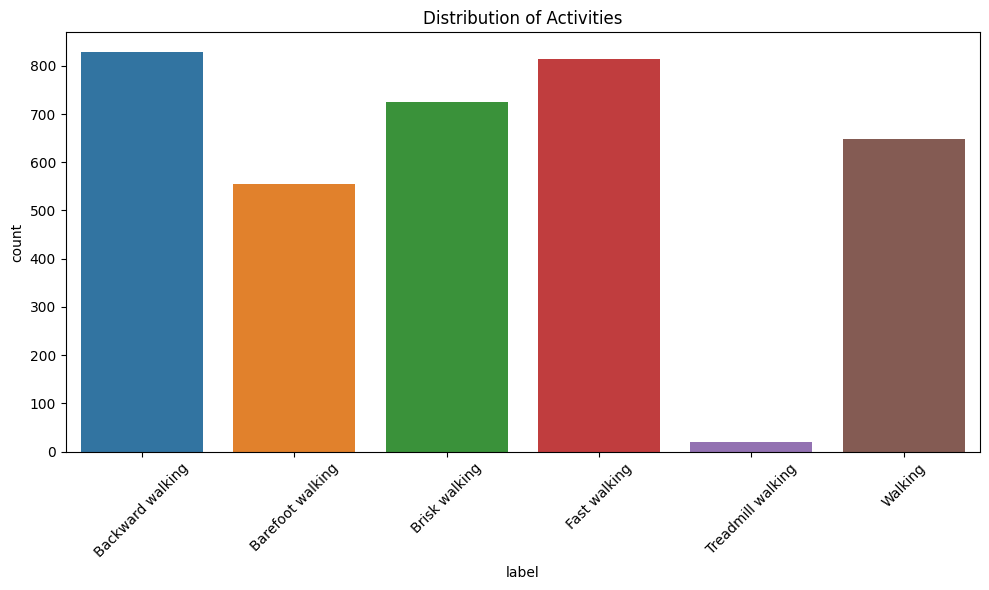

In [14]:
# Visualize class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='label')
plt.title('Distribution of Activities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
print("\
Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
            X_mean        X_std        X_min        X_max        X_rms  \
count  3589.000000  3589.000000  3589.000000  3589.000000  3589.000000   
mean      0.600954     2.198307    -4.454477     5.723330     3.373781   
std       3.604104     1.644067     4.300725     6.218865     3.070298   
min      -4.093913     0.201145   -31.602905    -1.829170     0.200148   
25%      -1.883977     0.992261    -7.564311     1.821000     1.278702   
50%      -0.094564     1.668503    -3.404555     3.292027     2.630317   
75%       0.950462     3.108673    -1.465305     7.517950     3.991922   
max      15.383512    12.268742     6.324829    43.983879    18.800021   

            X_skew   X_kurtosis       Y_mean        Y_std        Y_min  ...  \
count  3589.000000  3589.000000  3589.000000  3589.000000  3589.000000  ...   
mean     -0.038215     0.155173    -1.718723     2.251084    -8.246042  ...   
std       0.572142     1.667377     6.518523     1.899216    12.563379  

In [16]:
# Separate features and target
X = df.drop('label', axis=1)
y = df['label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Create a dataframe for scaled data for visualization if needed
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)

Shape of X_train: (2871, 21)
Shape of X_test: (718, 21)


In [43]:
selector = SelectKBest(score_func=f_classif, k=20)  # Adjust k as needed
X = selector.fit_transform(X, y)

In [47]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validated accuracy:", scores.mean())


Cross-validated accuracy: 0.46473156878513455


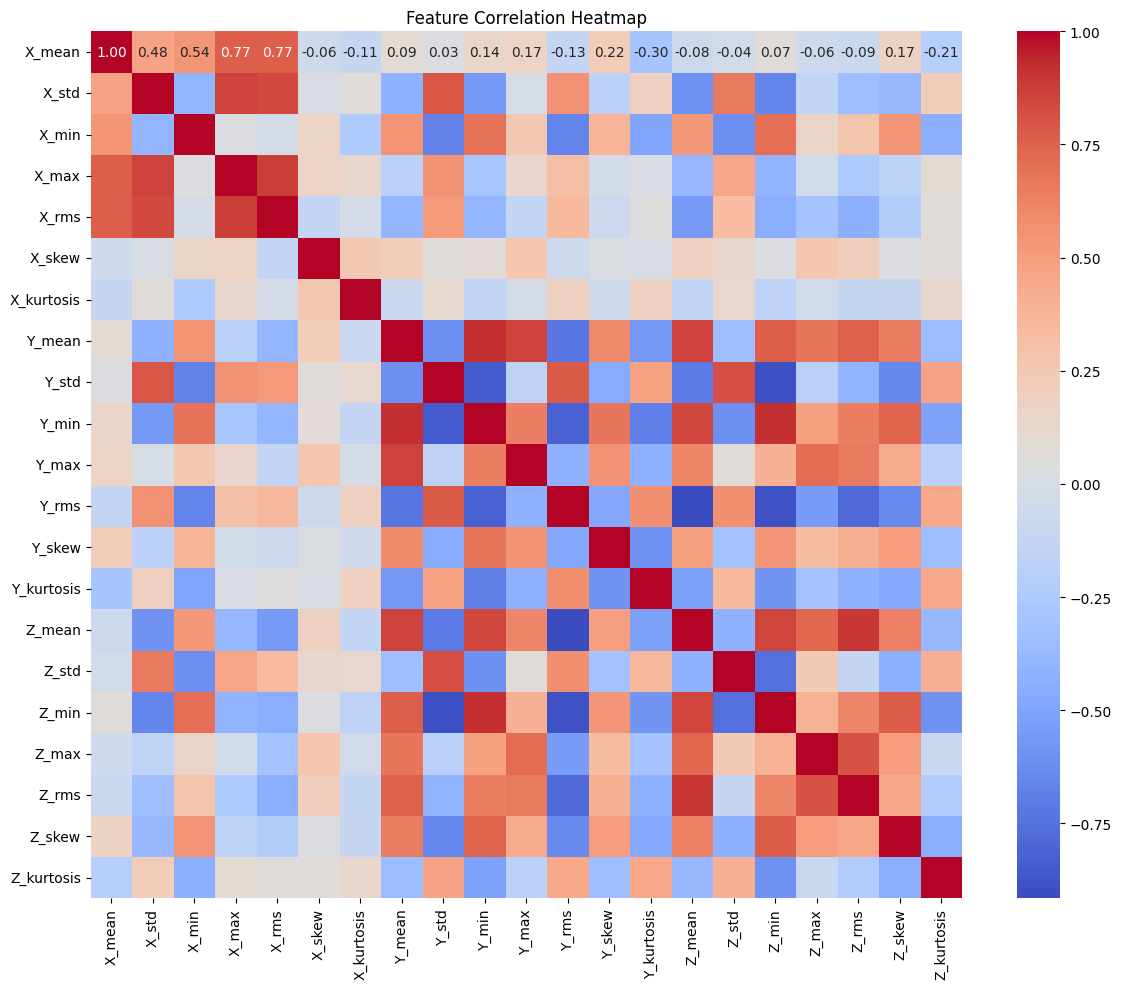

In [18]:
# Quick visualization: correlation heatmap of original features
plt.figure(figsize=(12,10))
sns.heatmap(df.drop('label', axis=1).corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [19]:
# Baseline model: RandomForest
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}


In [20]:

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=1)


In [21]:

# Fit the grid search on training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [22]:
# Baseline model: RandomForest
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=1)



In [23]:
# Fit the grid search on training data
grid_search.fit(X_train, y_train)

print('Best Hyperparameters:', grid_search.best_params_)
print('\
Best cross-validation score:', grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.7791807301923951


In [24]:
# #@title Model Training UI
# import ipywidgets as widgets
# from IPython.display import display

# # Define widgets for hyperparameter tuning
# n_estimators_slider = widgets.IntSlider(min=50, max=200, step=50, value=100, description='n_estimators:')
# max_depth_dropdown = widgets.Dropdown(options=[None, 10, 20, 30], value=None, description='max_depth:')
# min_samples_split_slider = widgets.IntSlider(min=2, max=10, step=1, value=2, description='min_samples_split:')

# # Button to trigger training
# train_button = widgets.Button(description="Train Model")

# # Output area for results
# output = widgets.Output()

# def on_train_button_clicked(b):
#     with output:
#         output.clear_output()  # Clear previous output
#         print("Training model with the following hyperparameters:")
#         print(f"- n_estimators: {n_estimators_slider.value}")
#         print(f"- max_depth: {max_depth_dropdown.value}")
#         print(f"- min_samples_split: {min_samples_split_slider.value}")

#         # Use the selected hyperparameters
#         best_rf = RandomForestClassifier(n_estimators=n_estimators_slider.value,
#                                         max_depth=max_depth_dropdown.value,
#                                         min_samples_split=min_samples_split_slider.value,
#                                         random_state=42)
#         best_rf.fit(X_train, y_train)

#         # Predict and evaluate (same as before)
#         y_pred = best_rf.predict(X_test)
#         print('\nClassification Report:')
#         print(classification_report(y_test, y_pred))

#         # ... (Rest of your evaluation code, like confusion matrix plotting)

# train_button.on_click(on_train_button_clicked)

# # Display widgets
# display(n_estimators_slider, max_depth_dropdown, min_samples_split_slider, train_button, output)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.7791807301923951
Classification Report:
                   precision    recall  f1-score   support

 Backward walking       0.70      0.82      0.75       166
 Barefoot walking       0.72      0.67      0.69       111
    Brisk walking       0.93      0.86      0.89       145
     Fast walking       0.85      0.88      0.86       163
Treadmill walking       1.00      0.50      0.67         4
          Walking       0.72      0.64      0.68       129

         accuracy                           0.78       718
        macro avg       0.82      0.73      0.76       718
     weighted avg       0.79      0.78      0.78       718



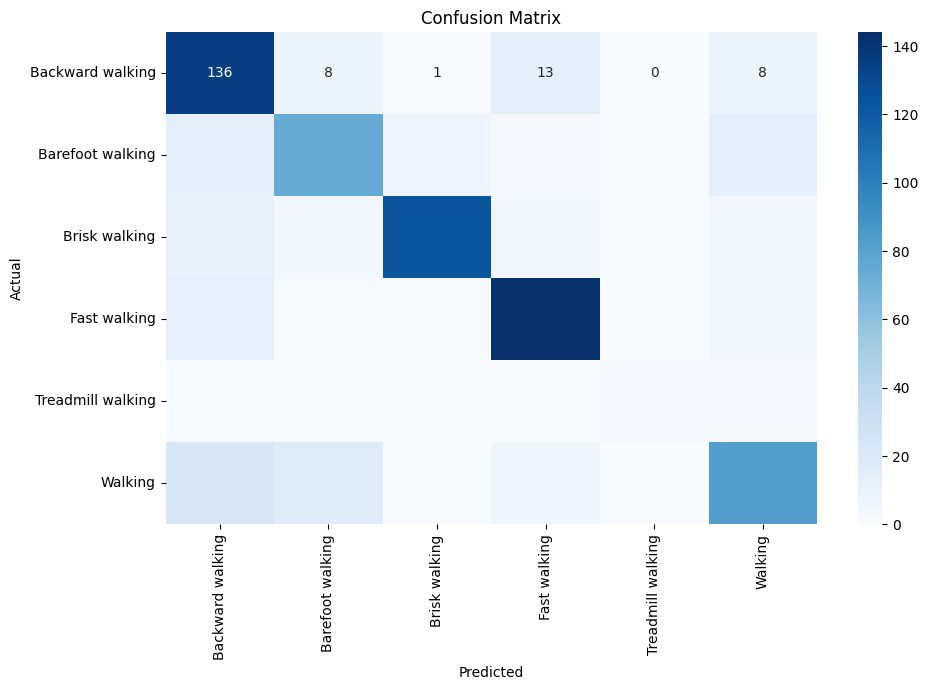

In [25]:
# Baseline model: RandomForest
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=1)

# Fit the grid search on training data
grid_search.fit(X_train, y_train)

print('Best Hyperparameters:', grid_search.best_params_)
print('\
Best cross-validation score:', grid_search.best_score_)

# Train the best estimator on full training data
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Predict on test set
y_pred = best_rf.predict(X_test)

# Evaluate the model
print('\
Classification Report:')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_rf.classes_, yticklabels=best_rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


In [67]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

In [89]:
# Assume the target column is named 'activity' and remaining columns are features
if 'activity' not in df.columns:
    print('Target column "activity" not found. Using last column as target.')
    target = df.columns[-1]
else:
    label = 'activity'

X = df.drop(columns=[target])
y = df[target]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Define models to compare
models = {
    'RandomForest': RandomForestClassifier(random_state=55),
    'SVC': SVC(random_state=55),
    'DecisionTree': DecisionTreeClassifier(random_state=55),
    'LogisticRegression': LogisticRegression(max_iter=500, random_state=55)  # as a linear model classifier
}

# Hyperparameter grids for a quick tuning
# param_grids = {
#     'RandomForest': {'n_estimators': [50, 100]},
#     'SVC': {'C': [0.1, 1], 'kernel': ['rbf']},
#     'DecisionTree': {'max_depth': [None, 10, 20]},
#     'LogisticRegression': {'C': [0.1, 1, 10]}
# }
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    # 'max_depth': [3,5,7,9],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

print("Best accuracy:", grid.best_score_)
print("Best parameters:", grid.best_params_)

results = {}

# Train each model using GridSearchCV for basic hyperparameter tuning and cross validation
for model_name, model in models.items():
    print('Tuning and training ' + model_name)
    grid = GridSearchCV(model, param_grids[model_name], cv=5, scoring='f1_weighted', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[model_name] = {'Best Params': grid.best_params_, 'Accuracy': acc, 'F1 Score': f1}
    print(model_name, ' Accuracy:', acc, ', F1:', f1)


# Display the results in a DataFrame
results_df = pd.DataFrame(results).T
print('\
Model Comparison:')
print(results_df)

Target column "activity" not found. Using last column as target.
Best accuracy: 0.47727299215626856
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuning and training RandomForest
RandomForest  Accuracy: 0.8008356545961003 , F1: 0.8008638760434506
Tuning and training SVC
SVC  Accuracy: 0.7158774373259053 , F1: 0.7154381804082436
Tuning and training DecisionTree
DecisionTree  Accuracy: 0.6782729805013927 , F1: 0.679705895049171
Tuning and training LogisticRegression


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

LogisticRegression  Accuracy: 0.6295264623955432 , F1: 0.6249796946713383
Model Comparison:
                                  Best Params  Accuracy  F1 Score
RandomForest            {'n_estimators': 100}  0.800836  0.800864
SVC                 {'C': 1, 'kernel': 'rbf'}  0.715877  0.715438
DecisionTree                {'max_depth': 10}  0.678273  0.679706
LogisticRegression                  {'C': 10}  0.629526   0.62498


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


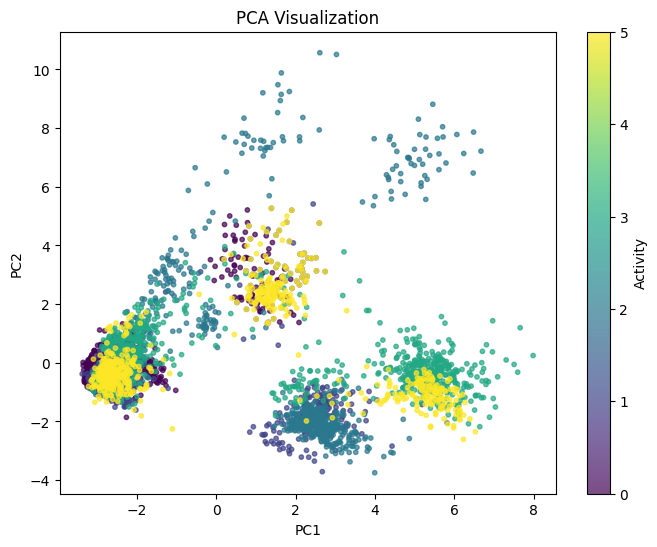

In [91]:
# Plotting PCA, t-SNE visualizations (taking a subset for t-SNE to speed up)
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=pd.factorize(y)[0], cmap='viridis', s=10, alpha=0.7)
plt.title('PCA Visualization')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Activity')
plt.show()

#### 

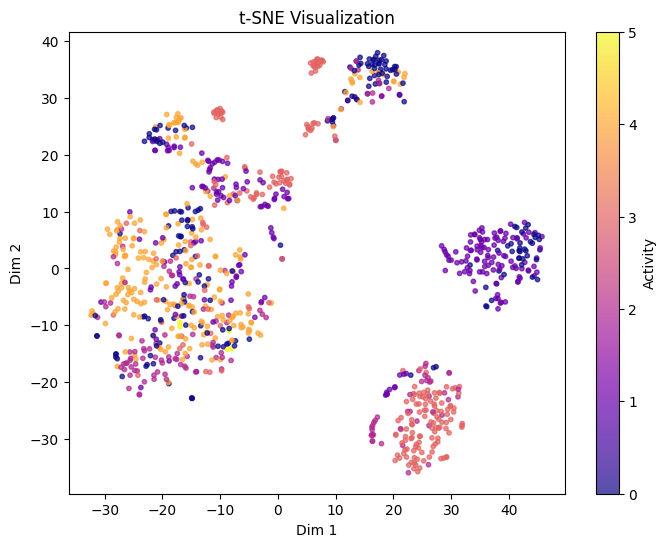

In [93]:
# t-SNE (on a subset for speed)
subset = 1000
if X_scaled.shape[0] > subset:
    idx = np.random.choice(X_scaled.shape[0], subset, replace=False)
    X_subset = X_scaled[idx]
    y_subset = np.array(y)[idx]
else:
    X_subset = X_scaled
    y_subset = np.array(y)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_subset)
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=pd.factorize(y_subset)[0], cmap='plasma', s=10, alpha=0.7)
plt.title('t-SNE Visualization')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.colorbar(label='Activity')
plt.show()

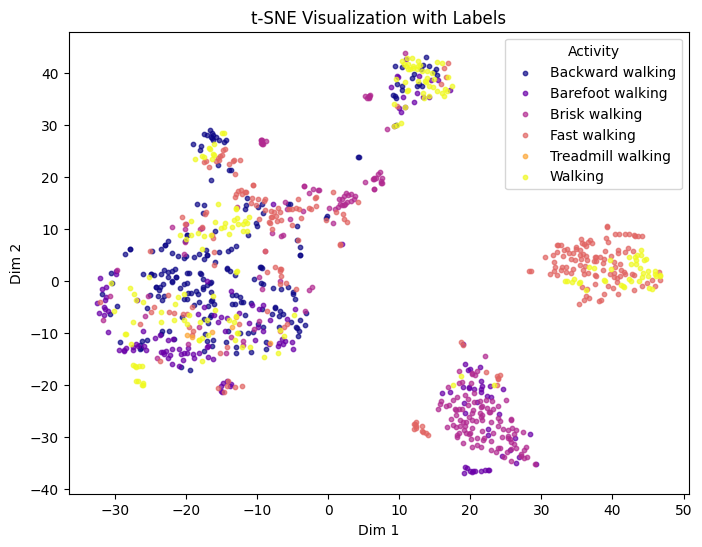

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# t-SNE (on a subset for speed)
subset = 1000
if X_scaled.shape[0] > subset:
    idx = np.random.choice(X_scaled.shape[0], subset, replace=False)
    X_subset = X_scaled[idx]
    y_subset = np.array(y)[idx]
else:
    X_subset = X_scaled
    y_subset = np.array(y)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_subset)

# Get unique labels and create a color map
unique_labels = np.unique(y_subset)
num_labels = len(unique_labels)
cmap = plt.get_cmap('plasma', num_labels) # Use a colormap with enough distinct colors

# Create the scatter plot with labels
plt.figure(figsize=(8,6))
for i, label in enumerate(unique_labels):
    label_indices = np.where(y_subset == label)[0]
    plt.scatter(X_tsne[label_indices, 0], X_tsne[label_indices, 1],
                c=[cmap(i)], label=label, s=10, alpha=0.7)

plt.title('t-SNE Visualization with Labels')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.legend(title="Activity")  # Add a legend with activity labels
plt.show()


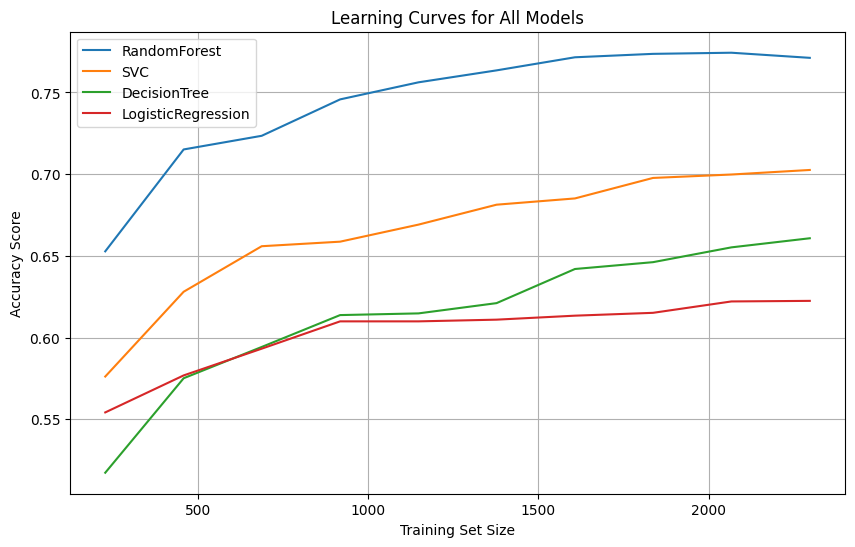

In [99]:
# Assuming 'models' dictionary contains your trained models (as in your previous code)
train_sizes, train_scores, test_scores = {}, {}, {}

for model_name, model in models.items():
    train_sizes[model_name], train_scores[model_name], test_scores[model_name] = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )

plt.figure(figsize=(10, 6))

for model_name in models:
    plt.plot(train_sizes[model_name], np.mean(test_scores[model_name], axis=1), label=model_name)

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curves for All Models')
plt.legend()
plt.grid(True)
plt.show()


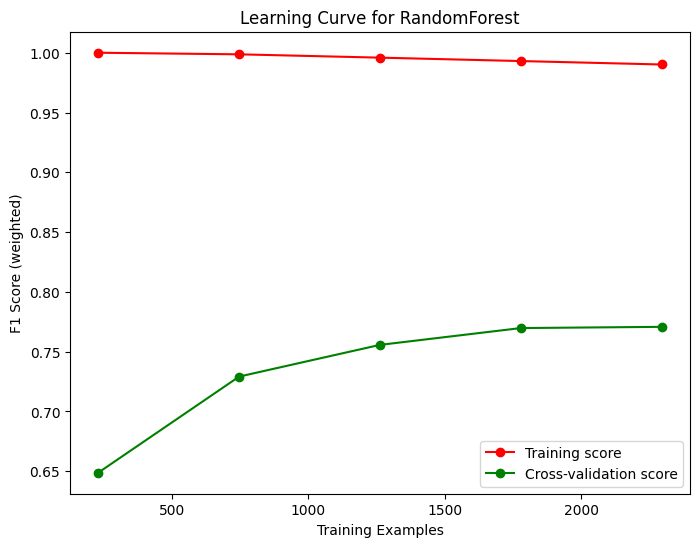

Saved best model (RandomForest) and scaler to disk.


In [101]:
# Learning curve for the best performing classifier (based on F1 Score, let us choose RandomForest if tied)
best_model_name = max(results.items(), key=lambda x: x[1]['F1 Score'])[0]
best_model_final = models[best_model_name].set_params(**results[best_model_name]['Best Params'])

train_sizes, train_scores, test_scores = learning_curve(best_model_final, X_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curve for ' + best_model_name)
plt.xlabel('Training Examples')
plt.ylabel('F1 Score (weighted)')
plt.legend(loc='best')
plt.show()

# Save the best performing model and the scaler
import joblib
joblib.dump(best_model_final, 'har_model.joblib')
joblib.dump(scaler, 'har_scaler.joblib')
print('Saved best model (' + best_model_name + ') and scaler to disk.')

In [32]:
# First install streamlit if not already installed
%pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [103]:
import joblib

# Load the saved model
model = joblib.load('har_model.joblib')

# Save it with the name that UI expects
joblib.dump(model, 'best_rf.joblib')
print('Model saved as best_rf.joblib')

Model saved as best_rf.joblib


In [34]:
# Save the trained model and scaler
import joblib
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Save the model and scaler
joblib.dump(model, 'best_rf.joblib')
joblib.dump(scaler, 'har_scaler.joblib')

# Create streamlit app
# %%writefile app.py

# Load the saved model and scaler
model = joblib.load('har_model.joblib')
scaler = joblib.load('har_scaler.joblib')

def main():
    st.title('Human Activity Recognition System')
    st.write('Enter accelerometer data to predict the activity')
    
    # Create input fields for all features
    col1, col2, col3 = st.columns(3)
    
    with col1:
        x_mean = st.number_input('X Mean', value=0.0)
        x_std = st.number_input('X Std', value=0.0)
        x_min = st.number_input('X Min', value=0.0)
        x_max = st.number_input('X Max', value=0.0)
        x_rms = st.number_input('X RMS', value=0.0)
        x_skew = st.number_input('X Skewness', value=0.0)
        x_kurtosis = st.number_input('X Kurtosis', value=0.0)

    with col2:
        y_mean = st.number_input('Y Mean', value=0.0)
        y_std = st.number_input('Y Std', value=0.0)
        y_min = st.number_input('Y Min', value=0.0)
        y_max = st.number_input('Y Max', value=0.0)
        y_rms = st.number_input('Y RMS', value=0.0)
        y_skew = st.number_input('Y Skewness', value=0.0)
        y_kurtosis = st.number_input('Y Kurtosis', value=0.0)

    with col3:
        z_mean = st.number_input('Z Mean', value=0.0)
        z_std = st.number_input('Z Std', value=0.0)
        z_min = st.number_input('Z Min', value=0.0)
        z_max = st.number_input('Z Max', value=0.0)
        z_rms = st.number_input('Z RMS', value=0.0)
        z_skew = st.number_input('Z Skewness', value=0.0)
        z_kurtosis = st.number_input('Z Kurtosis', value=0.0)

    if st.button('Predict Activity'):
        # Create input array
        input_data = np.array([[
            x_mean, x_std, x_min, x_max, x_rms, x_skew, x_kurtosis,
            y_mean, y_std, y_min, y_max, y_rms, y_skew, y_kurtosis,
            z_mean, z_std, z_min, z_max, z_rms, z_skew, z_kurtosis
        ]])
        
        # Scale the input
        input_scaled = scaler.transform(input_data)
        
        # Make prediction
        prediction = model.predict(input_scaled)
        
        # Display result
        st.success(f'Predicted Activity: {prediction[0]}')

if __name__ == '__main__':
    main()

print("Created app.py with Streamlit interface")
print("\
To run the app, use the command: streamlit run app.py")

2025-05-05 17:58:06.138 
  command:

    streamlit run /opt/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


Created app.py with Streamlit interface
To run the app, use the command: streamlit run app.py


In [35]:
# # The error "NameError: name 'best_rf' is not defined" means you're trying to use a variable named `best_rf` in your code (specifically,
# on line 9) before you've assigned any value to it.  The Python interpreter doesn't know what `best_rf` is because you haven't created it 
# or given it a value through an assignment like `best_rf = ...`.  Essentially, you haven't defined what `best_rf` represents.  In this context,
# it looks like you intended `best_rf` to hold your trained model.  You need to train your random forest model and store the result in a 
# variable called `best_rf` *before* you try to save it using `joblib.dump`.

In [36]:
streamlit run app.py

SyntaxError: invalid syntax (3737097518.py, line 1)